In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel ('Superstore_Data.xlsx')

In [3]:
# Adds 'Year' column based on 'Order Date' column
df['Year'] = df['Order Date'].dt.year.astype(str)

# Adds 'Ship Time' column
df['Ship Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Rounds 'Sales' and 'Profit' columns to 2 decial places
df['Sales'] = df['Sales'].round(2).astype(float)
df['Profit'] = df['Profit'].round(2).astype(float)

In [4]:
# Total Transactions
Total_Transacations =  df['Product ID'].count()

In [5]:
# Total Sales/Profits Per Year
Sales_Per_Year = df.groupby(df['Year'])['Sales'].sum()
Profit_Per_Year = df.groupby(df['Year'])['Profit'].sum()

Text(0.5, 1.0, 'Total Profits Per Year')

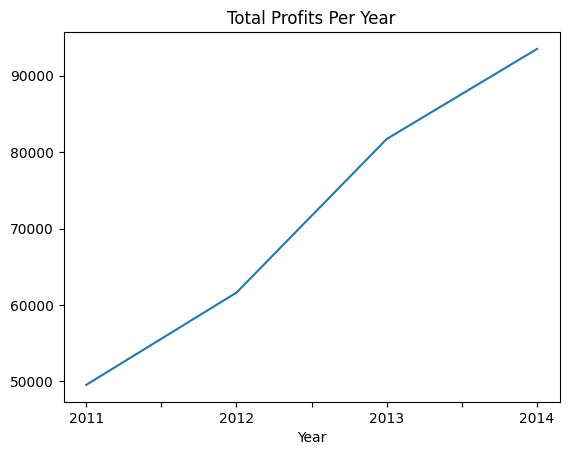

In [6]:
# Profits Per Year
Profit_Per_Year.plot()
plt.title("Total Profits Per Year")

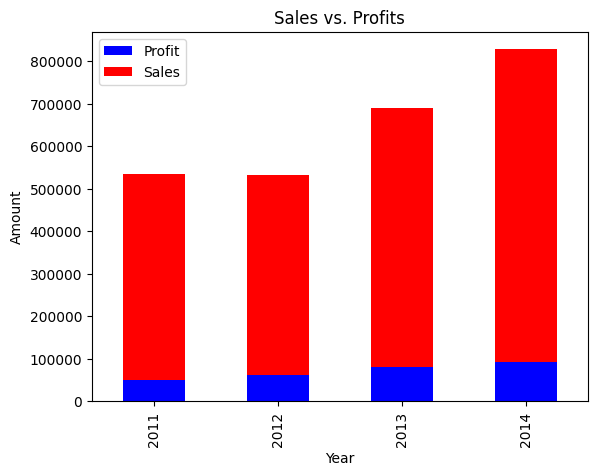

In [7]:
# Profits vs. Sales
Profit_Per_Year.plot(kind = "bar", color = "b")
Sales_Per_Year.plot(kind = "bar", bottom=Profit_Per_Year, color ="r")
plt.title("Sales vs. Profits")
plt.ylabel("Amount")
plt.legend()
plt.show()

In [8]:
# Profits by State
Profits_By_State = df.groupby(['State'])['Profit'].sum().sort_values(ascending=False).reset_index()

In [9]:
# Most Profitable States
Profits_By_State.head(5)

,State,Profit
0,California,76381.05
1,New York,74038.39
2,Washington,33402.63
3,Michigan,24463.11
4,Virginia,18597.93


In [10]:
# States with net loss
Profits_By_State[Profits_By_State['Profit'] <= 0]

,State,Profit
39,Oregon,-1190.47
40,Florida,-3399.30
41,Arizona,-3427.90
42,Tennessee,-5341.68
43,Colorado,-6527.89
44,North Carolina,-7490.89
45,Illinois,-12607.99
46,Pennsylvania,-15560.07
47,Ohio,-16971.40
48,Texas,-25729.44


Text(0, 0.5, '')

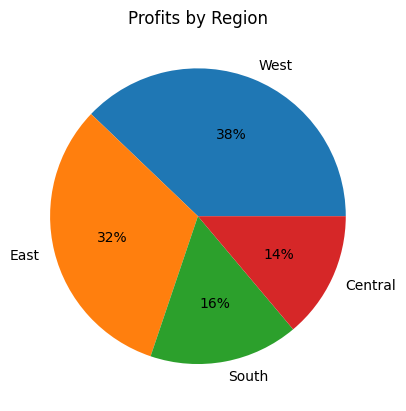

In [11]:
# Profits by Region
df.groupby(['Region'])['Profit'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%')
plt.title ('Profits by Region')
plt.ylabel('')

In [12]:
# Pivot Table - Profits by Region/Category
df.pivot_table(index = ['Region', 'Category'], values = 'Profit', aggfunc="sum").reset_index()

,Region,Category,Profit
0,Central,Furniture,-2871.08
1,Central,Office Supplies,8879.63
2,Central,Technology,33697.52
3,East,Furniture,3046.15
4,East,Office Supplies,41014.22
5,East,Technology,47462.02
6,South,Furniture,6771.16
7,South,Office Supplies,19986.25
8,South,Technology,19991.94
9,West,Furniture,11504.88


In [13]:
# Profit By Item
Profit_by_Item = df.groupby(['Product Name'])['Profit'].sum().sort_values(ascending=False).reset_index()

In [14]:
# Most profitable items
Profit_by_Item.head(5)

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.94
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04
2,Hewlett Packard LaserJet 3310 Copier,6983.89
3,Canon PC1060 Personal Laser Copier,4570.94
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.98


In [15]:
# Least profitable items
Profit_by_Item.tail(5)

,Product Name,Profit
1836,Bush Advantage Collection Racetrack Conference...,-1934.40
1837,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.11
1838,Cubify CubeX 3D Printer Triple Head Print,-3839.99
1839,Lexmark MX611dhe Monochrome Laser Printer,-4589.97
1840,Cubify CubeX 3D Printer Double Head Print,-8879.97


In [16]:
# Number/percentage of items with a net loss
print(sum(Profit_by_Item['Profit'] < 0))
print(sum(Profit_by_Item['Profit'] < 0) / df['Product Name'].nunique() * 100)

301
16.34980988593156


Text(0, 0.5, 'Discount')

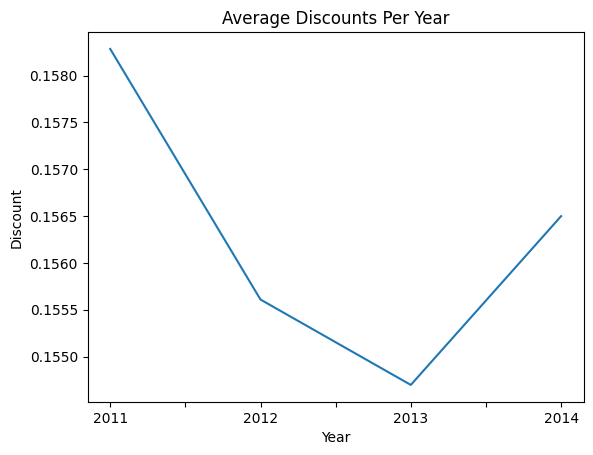

In [17]:
# Average discounts by Year
df.groupby(['Year'])['Discount'].mean().plot()
plt.title ('Average Discounts Per Year')
plt.ylabel('Discount')

In [18]:
#Percentage of transactions discounted
sum(df['Discount'] != 0) / Total_Transacations * 100

51.9911947168301

Text(0, 0.5, 'Days')

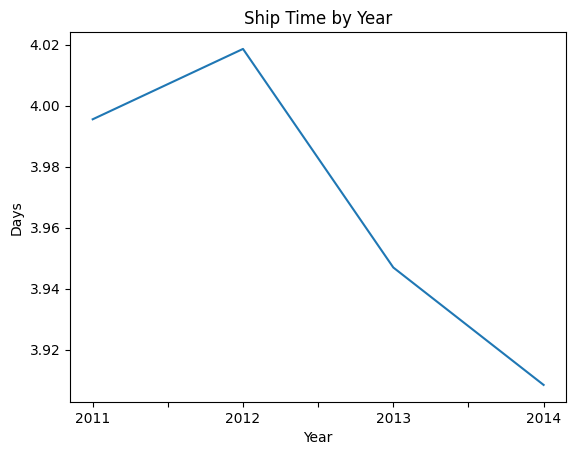

In [19]:
# Ship Time by Year
df.groupby(['Year'])['Ship Time'].mean().plot()
plt.title('Ship Time by Year')
plt.xlabel('Year')
plt.ylabel('Days')

In [20]:
# Creates Pivot Table to display Customer Sales by Year
PT = df.pivot_table(index = 'Customer Name', columns ='Year', values = 'Sales', aggfunc='sum')

# Creates new dataframe from Pivot Table
Customer_Gap_2014 = PT.reset_index()

# Filters dataframe to show customers from 2011-2013, but not in 2014
Customer_Gap_2014 = Customer_Gap_2014[Customer_Gap_2014['2011'].notna() & Customer_Gap_2014['2012'].notna() & Customer_Gap_2014['2013'].notna() & Customer_Gap_2014['2014'].isna()]

# Removes '2014' Column and adds 'Total' Column
Customer_Gap_2014 = Customer_Gap_2014.drop(columns=['2014'])
Customer_Gap_2014['Total'] = Customer_Gap_2014['2011'] + Customer_Gap_2014['2012'] + Customer_Gap_2014['2013']
Customer_Gap_2014.sort_values('Total', ascending=False).head()


Year,Customer Name,2011,2012,2013,Total
730,Tamara Chand,622.32,85.85,18344.05,19052.22
416,Karen Daniels,1639.50,325.70,6317.16,8282.36
45,Anna Häberlin,177.68,1945.84,5764.78,7888.30
391,Jonathan Doherty,1299.48,130.28,6181.11,7610.87
632,Rick Huthwaite,273.96,731.25,5973.97,6979.18


In [21]:
#Total number of customers that dropped in 2014
Customer_Gap_2014['Customer Name'].count()

44